In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models,Input
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

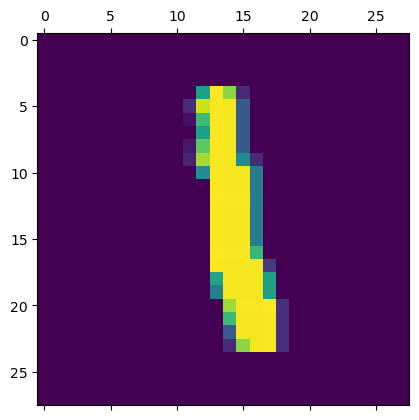

In [20]:
plt.matshow(X_train[6])


In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape


(60000, 784)

# With ANN layer

In [13]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/Users/gayatrimanjarisahu/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-02 16:56:32.584340: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-02 16:56:32.584397: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-02 16:56:32.584408: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-02 16:56:32.585530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-02 16:56:32.586155: I tensorflow/core/common_runtime/pluggable_device/pluggable_devi

Epoch 1/5


2025-04-02 16:56:35.381511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8145 - loss: 0.7171
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9139 - loss: 0.3067
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9217 - loss: 0.2843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9244 - loss: 0.2700
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2632


In [14]:
model.evaluate(X_test_flattened, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.3046


[0.27012503147125244, 0.9254999756813049]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


array([2.0772705e-02, 3.4863439e-07, 4.4578422e-02, 9.7059375e-01,
       2.9499400e-03, 1.3439207e-01, 1.4739367e-06, 9.9989557e-01,
       1.3999583e-01, 6.6472185e-01], dtype=float32)

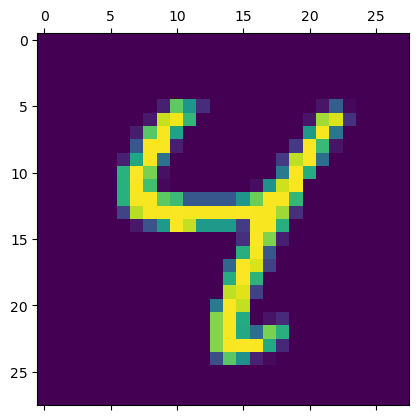

In [19]:
plt.matshow(X_test[6])


In [21]:
#match with the digit predicted.
np.argmax(y_predicted[6])


4

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    0,    5,   14,    4,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  923,   18,    8,    3,   14,   12,   38,    4],
       [   0,    0,   14,  936,    0,   16,    3,   13,   22,    6],
       [   1,    1,    2,    2,  923,    0,   13,    4,    9,   27],
       [   8,    3,    2,   42,   10,  758,   22,   10,   31,    6],
       [   7,    3,    6,    1,    8,    7,  922,    2,    2,    0],
       [   1,    5,   21,    8,    6,    0,    0,  966,    2,   19],
       [   4,    6,    7,   23,    9,   22,   11,   15,  872,    5],
       [   9,    7,    2,   11,   33,    5,    0,   41,    9,  892]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

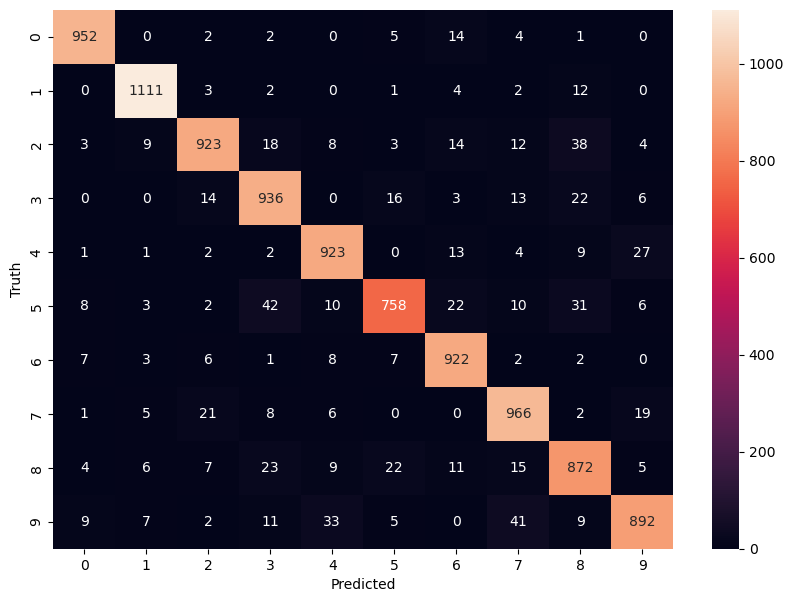

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Using hidden layers:

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8720 - loss: 0.4481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9614 - loss: 0.1330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9734 - loss: 0.0905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9798 - loss: 0.0670
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9842 - loss: 0.0502


In [33]:
model.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0875


[0.07742474973201752, 0.9757999777793884]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


Text(95.72222222222221, 0.5, 'Truth')

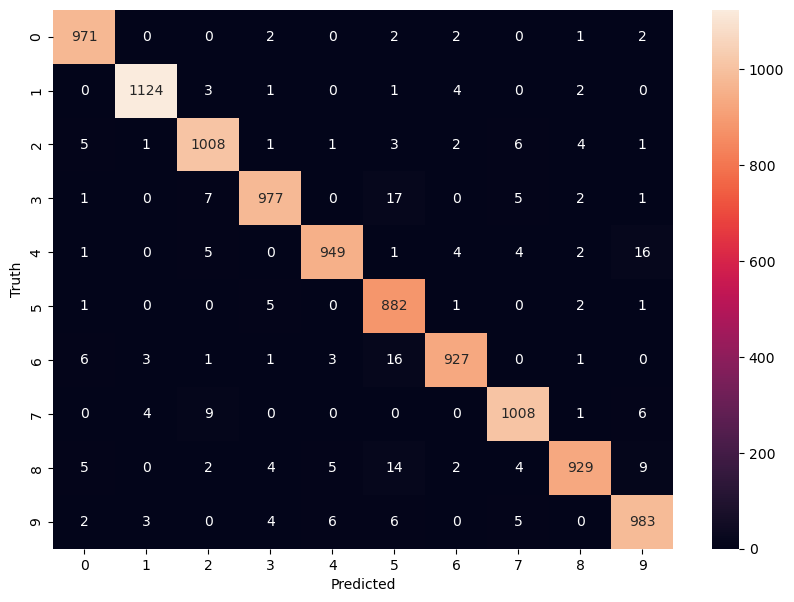

In [34]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# With CNN layer

In [47]:
#using CNN layer
cnn = models.Sequential([
    Input(shape=(28, 28,1)),
#As the dataset is 2 dimensional, input shape has taken 32,32,1 ,where 1 is greyscale value.    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [49]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [50]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9017 - loss: 0.3219
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9853 - loss: 0.0476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9902 - loss: 0.0323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9923 - loss: 0.0241
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9948 - loss: 0.0161
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9960 - loss: 0.0130
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9967 - loss: 0.0092
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9973 - loss: 0.0092
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9978 - loss: 0.0069
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9978 - loss: 0.0062


In [53]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0380


[0.031247692182660103, 0.9919999837875366]

In [58]:
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])
print(y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7, 2, 1, 0, 4]
[7 2 1 0 4]


Text(95.72222222222221, 0.5, 'Truth')

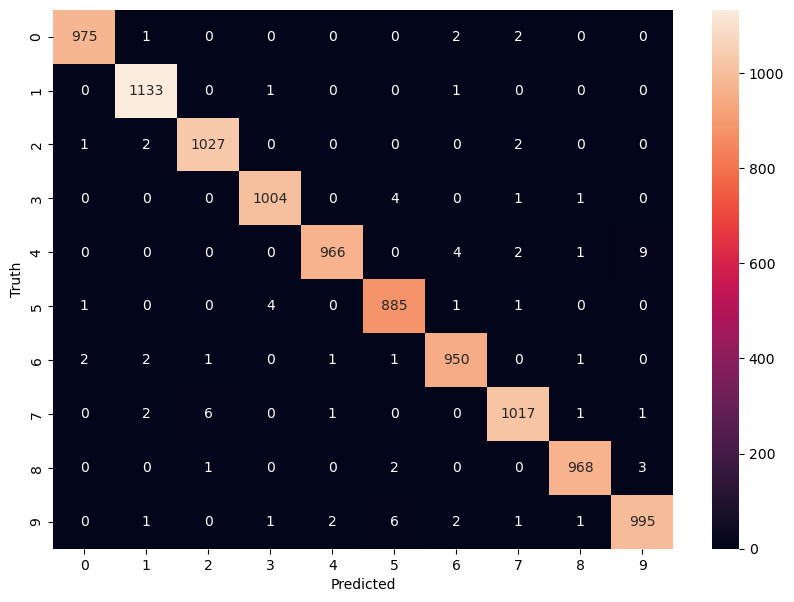

In [56]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')